In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

#### Functions

In [26]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [27]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    # MPP return [pointOnBoundary(x_min), pointOnBoundary(x_max)] < -- Code typo
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [28]:
def plot_data_w_boundary(X, y, weights):
    # Print the data with a line representing the decision boundary
    y_bound = np.zeros([2])
    X_bound = np.zeros([2])
    
    # Get min and max X Coordinate in the Data Set    
    X_bound[0] = X[:,0].min()
    X_bound[1] = X[:,0].max()

    # Get the Y coordinates for min and max X
    y_bound[0], y_bound[1] = decision_boundary(weights, X_bound[0], X_bound[1])
    
    # Assign colours based on the labels (1,-1) = (steelblue,darkred)
    colors = ['steelblue' if label == 1 else 'darkred' for label in y]
       
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 10) 
    plt.title("Dataset with Decision Boundary")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    # Plot Decision Boundary
    plt.plot(X_bound, y_bound, linestyle='dashed', color='black')
    
    plt.show() 

In [29]:
# Function to plot the decision boundary for a logistic regressino
# Code adapted from post at https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
def plot_log_reg_boundary(X,y,logreg):
    xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)
        
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-2, 2), ylim=(-2, 2),
           xlabel="$X_1$", ylabel="$X_2$")

#### Class to Perform Homebrew Implementation of Linear Classification
* Class methods are modelled on the methods that a typical sklearn classifier provides

In [30]:
class MyLinClass(object):
    
    def __init__ (self, n_weights):
        self.weights = np.zeros([(n_weights+1),])
        
    def fit(self,X,y):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        X_1s_dagger = np.linalg.pinv(X_1s)
        self.weights = np.matmul(X_1s_dagger,y)
        
    def predict(self,X):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        yhat = np.sign(np.matmul(X_1s,self.weights))
        
        return yhat
    
    # For reference and comparison from sklearn classifier classes
    #def score(self,X,y):
    #    from sklearn.metrics import accuracy_score
    #    return accuracy_score(y, self.predict(X), sample_weight=None)
    
    def score(self,X,y):
        yhat = self.predict(X)
        errors = 0 
        for i in range(len(y)):
            if(y[i]!=yhat[i]):
                errors+=1
                
        return 1-(errors/len(y))

# Generate Dataset and Inspect Contents of Dataset

In [31]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

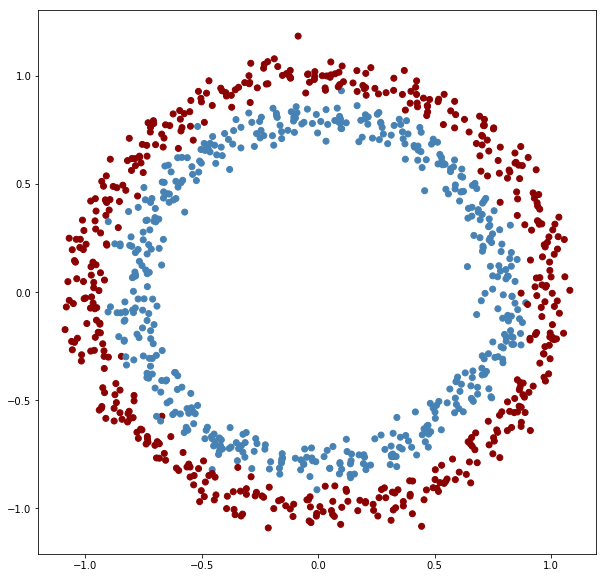

In [32]:
# Assign colours based on the labels (1,-1) = (steelblue,darkred)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]

# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
#plt.title("Dataset with Decision Boundary")
plt.scatter(X[:,0], X[:,1], color=colors) 


plt.show() 

# Dataset Transformations
* Figure 3.5 in "Learning from Data" has a similar example where the decision boundary between two datasets looks like a circle. In the book, the features are squared to make them linearly separable. I am going to follow a similiar approach here and call this dataset "X_sqrd"
* I also wanted to see if I could "unroll" the circles. Each (x1,x2) point makes an angle theta with the origin. If this angle is expressed in radians, it can be used to express the length of an arc from the X-axis along the circumference of the circle to the point. This has the effect of "unrolling" the circule circumference into a horizontal line. To ensure both circles do not land on the same line, the y coordinate of the line will be the radius of the circle.
* This transformation to unroll the circule is as follows:
  - x1_trig = arctan(x1/x2)
  - x2_trig = square_root(x1^2 + x2^2)
* This dataset will be referred to as "X_trig"

#### Trigonometric Transformation of Data

In [33]:
X_trig = np.empty(X.shape)

In [34]:
for i in range(X.shape[0]):
    X_trig[i][0] = np.arctan(X[i][1]/X[i][0])
    X_trig[i][1] = np.sqrt((X[i][1]**2)+(X[i][0]**2))
    #X_trig[i][1] = (X[i][1]**2)+(X[i][0]**2)

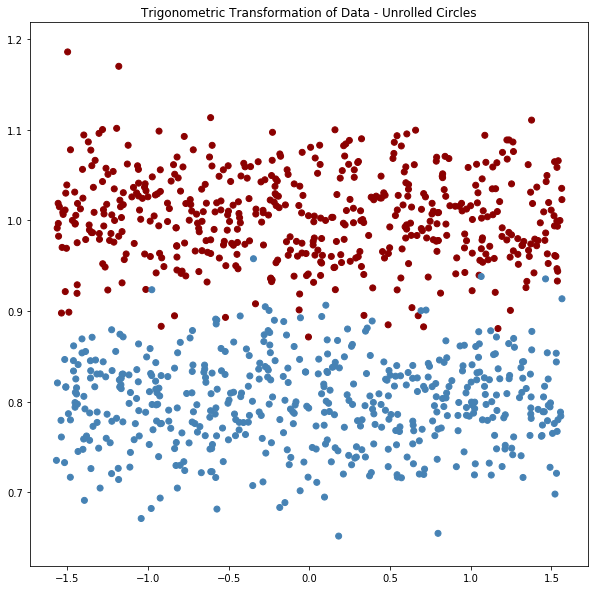

In [35]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Trigonometric Transformation of Data - Unrolled Circles")
plt.scatter(X_trig[:,0], X_trig[:,1], color=colors) 


plt.show() 

#### Squared Transformation of Data

In [36]:
X_sqrd = np.empty(X.shape)

In [37]:
for i in range(X.shape[0]):
    X_sqrd[i][0] = X[i][0]**2
    X_sqrd[i][1] = X[i][1]**2


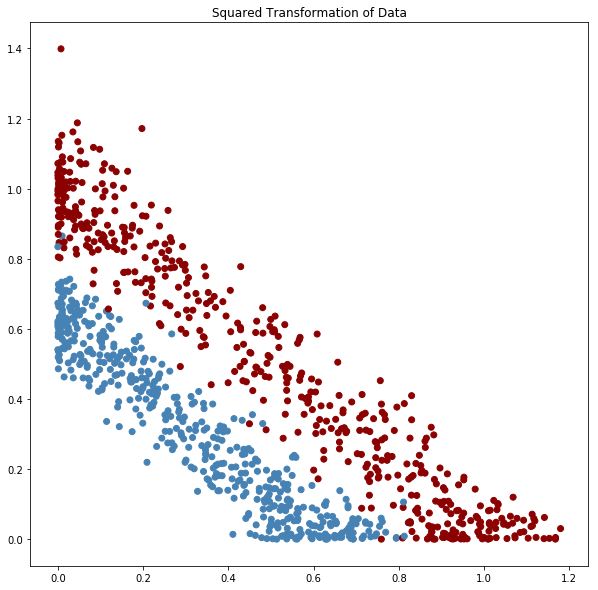

In [38]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Squared Transformation of Data")
plt.scatter(X_sqrd[:,0], X_sqrd[:,1], color=colors) 


plt.show() 

# Perform Linear Classification on Datasets

#### Split into Train and Test Sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_trig_train, X_trig_test, y_trig_train, y_trig_test = train_test_split(X_trig, y, test_size=0.2, random_state=0)
X_sqrd_train, X_sqrd_test, y_sqrd_train, y_sqrd_test = train_test_split(X_sqrd, y, test_size=0.2, random_state=0)

#### Linear Regression on Original Dataset

Train Score =  0.54125
Test  Score =  0.475


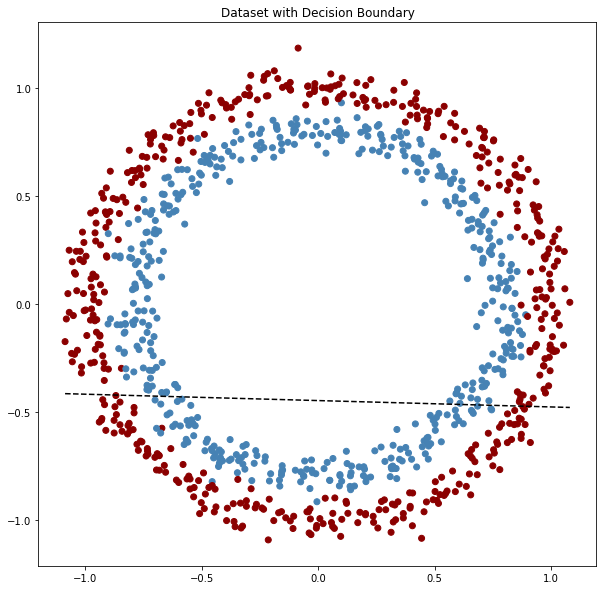

In [40]:
mlc_orig = MyLinClass(X_train.shape[1])
mlc_orig.fit(X_train,y_train)

mlc_orig_train_score = mlc_orig.score(X_train,y_train)
mlc_orig_test_score  = mlc_orig.score(X_test, y_test)

print("Train Score = ",mlc_orig_train_score)
print("Test  Score = ",mlc_orig_test_score)

plot_data_w_boundary(X, y, mlc_orig.weights)

#### Linear Regression on Trigonometric Dataset

Train Score =  0.97875
Test  Score =  0.985


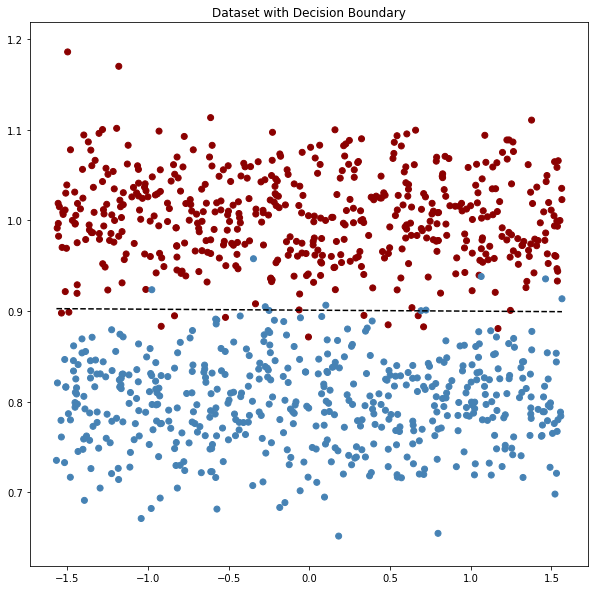

In [41]:
mlc_trig = MyLinClass(X_trig_train.shape[1])
mlc_trig.fit(X_trig_train,y_trig_train)

mlc_trig_train_score = mlc_trig.score(X_trig_train,y_trig_train)
mlc_trig_test_score  = mlc_trig.score(X_trig_test, y_trig_test)

print("Train Score = ",mlc_trig_train_score)
print("Test  Score = ",mlc_trig_test_score)

plot_data_w_boundary(X_trig, y, mlc_trig.weights)

#### Linear Regression on Squared Dataset

Train Score =  0.98
Test  Score =  0.985


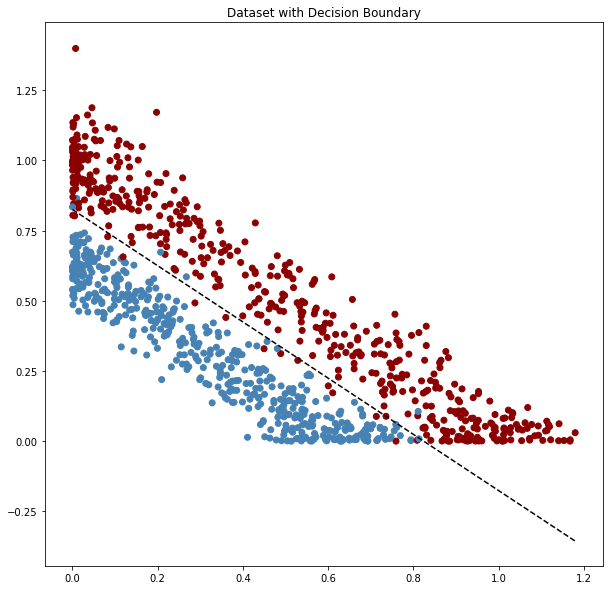

In [42]:
mlc_sqrd = MyLinClass(X_sqrd_train.shape[1])
mlc_sqrd.fit(X_sqrd_train,y_sqrd_train)

mlc_sqrd_train_score = mlc_sqrd.score(X_sqrd_train,y_sqrd_train)
mlc_sqrd_test_score  = mlc_sqrd.score(X_sqrd_test, y_sqrd_test)

print("Train Score = ",mlc_sqrd_train_score)
print("Test  Score = ",mlc_sqrd_test_score)

plot_data_w_boundary(X_sqrd, y, mlc_sqrd.weights)

#### Logistic Regression on Original Dataset

Train Score =  0.54
Test  Score =  0.475


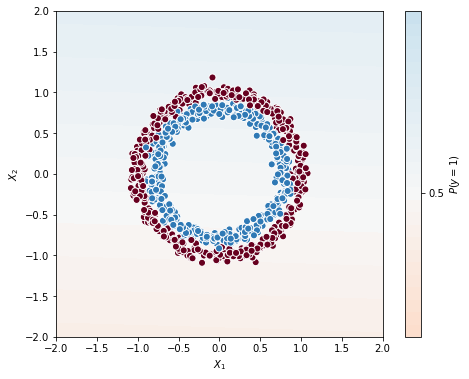

In [43]:
lgr_orig = LogisticRegression(fit_intercept=True, intercept_scaling=1, solver='lbfgs', random_state=0)
lgr_orig.fit(X_train,y_train)

lgr_orig_train_score = lgr_orig.score(X_train,y_train)
lgr_orig_test_score  = lgr_orig.score(X_test, y_test)

print("Train Score = ",lgr_orig_train_score)
print("Test  Score = ",lgr_orig_test_score)

plot_log_reg_boundary(X,y,lgr_orig)

#### Logistic Regression on Trigonometric Dataset

Train Score =  0.97875
Test  Score =  0.98


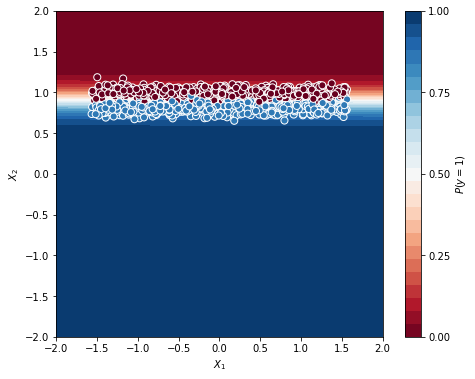

In [44]:
lgr_trig = LogisticRegression(fit_intercept=True, intercept_scaling=1, solver='liblinear', random_state=0)
lgr_trig.fit(X_trig_train,y_trig_train)

lgr_trig_train_score = lgr_trig.score(X_trig_train,y_trig_train)
lgr_trig_test_score  = lgr_trig.score(X_trig_test, y_trig_test)

print("Train Score = ",lgr_trig_train_score)
print("Test  Score = ",lgr_trig_test_score)

plot_log_reg_boundary(X_trig,y,lgr_trig)

#### Logistic Regression on Squared Dataset

Train Score =  0.97875
Test  Score =  0.985


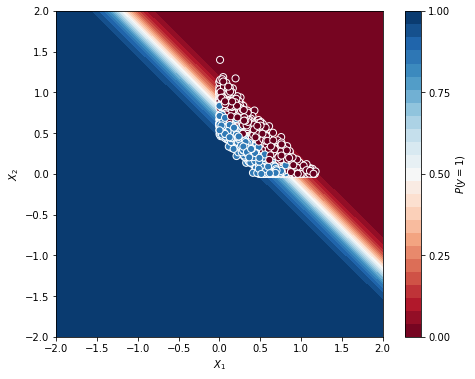

In [45]:
lgr_sqrd = LogisticRegression(fit_intercept=True, intercept_scaling=1, solver='liblinear', random_state=0)
#lgr_sqrd = LogisticRegression(fit_intercept=False, solver='liblinear', random_state=0)
lgr_sqrd.fit(X_sqrd_train,y_sqrd_train)

lgr_sqrd_train_score = lgr_sqrd.score(X_sqrd_train,y_sqrd_train)
lgr_sqrd_test_score  = lgr_sqrd.score(X_sqrd_test, y_sqrd_test)

print("Train Score = ",lgr_sqrd_train_score)
print("Test  Score = ",lgr_sqrd_test_score)

plot_log_reg_boundary(X_sqrd,y,lgr_sqrd)

# Summary

TBD

##### Cell Graveyard - Ignore alls cells below here

In [ ]:
print(X.shape)

In [ ]:
test_matrix = np.array([[4,7],[2,6]])

In [ ]:
print(test_matrix)

In [ ]:
print(np.linalg.pinv(test_matrix))

In [ ]:
np.c_[np.ones(len(test_matrix[1])),test_matrix]

In [ ]:
#print(y.shape())

In [ ]:
X_1s = np.c_[np.ones([X.shape[0],1]),X]

In [ ]:
X_1s.shape[1]

In [ ]:
print(X_1s)

In [ ]:
X_1s_dagger = np.linalg.pinv(X_1s)

In [ ]:
print(X_1s_dagger)

In [ ]:
w = np.matmul(X_1s_dagger,y)

In [ ]:
print(w)
print(type(w))
print(w.shape)

In [ ]:
yhat = np.sign(np.matmul(X_1s,w))

In [ ]:
print(yhat)

In [ ]:
errors = 0
for i in range(len(y)):
    if(y[i]!=yhat[i]):
        errors+=1
print(errors)

In [ ]:
plot_data_w_boundary(X, y, w)

In [ ]:
X_new = np.empty(X.shape)

In [ ]:
print(X_new)

In [ ]:
for i in range(X.shape[0]):
    X_new[i][0] = np.arctan(X[i][1]/X[i][0])
    X_new[i][1] = np.sqrt((X[i][1]**2)+(X[i][0]**2))
    #X_new[i][1] = (X[i][1]**2)+(X[i][0]**2)

In [ ]:
print(X_new)

In [ ]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 5) 
#plt.title("Dataset with Decision Boundary")
plt.scatter(X_new[:,0], X_new[:,1], color=colors) 


plt.show() 

In [ ]:
X_new_1s = np.c_[np.ones([X_new.shape[0],1]),X_new]

X_new_1s_dagger = np.linalg.pinv(X_new_1s)

w_new = np.matmul(X_new_1s_dagger,y)

yhat_new = np.sign(np.matmul(X_new_1s,w_new))

plot_data_w_boundary(X_new, y, w_new)

In [ ]:
print(yhat_new)

In [ ]:
errors = 0
for i in range(len(y)):
    if(y[i]!=yhat_new[i]):
        errors+=1
print(errors)
print(errors/len(y))

In [ ]:
yhat_new_reg = np.matmul(X_new_1s,w_new)

In [ ]:
print(yhat_new_reg)

In [ ]:
sqerr = 0
for i in range(len(y)):
    if(y[i]!=yhat_new[i]):
        errors+=1
    sqerr+=((yhat_new[i]-y[i])**2)
print(sqerr)
print(sqerr/len(y))

In [ ]:
mlc = MyLinClass(X_new.shape[1])
print(mlc.weights)
mlc.fit(X_new,y)

In [ ]:
print(mlc.weights)
print(X.shape[1])

In [ ]:
yhat_class = mlc.predict(X_new)

In [ ]:
mlc.score(X_new,y)

In [ ]:
mlc.score2(X_new,y)

In [ ]:
print(yhat_class[0:10])

In [ ]:
print(yhat_new[0:10])

In [ ]:
print(yhat_new-yhat_class)

In [ ]:
X_new_1s = np.c_[np.ones([X_new.shape[0],1]),X_new]

X_new_1s_dagger = np.linalg.pinv(X_new_1s)

w_new = np.matmul(X_new_1s_dagger,y)

yhat_new = np.sign(np.matmul(X_new_1s,w_new))

plot_data_w_boundary(X_new, y, w_new)

In [ ]:
X_new_1s = np.c_[np.ones([X_new.shape[0],1]),X_new]

X_new_1s_dagger = np.linalg.pinv(X_new_1s)

w_new = np.matmul(X_new_1s_dagger,y)

yhat_new = np.sign(np.matmul(X_new_1s,w_new))

plot_data_w_boundary(X_new, y, w_new)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lgr_orig.predict_proba(grid)[:, 1].reshape(xx.shape)

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-1, 1), ylim=(-1, 1),
       xlabel="$X_1$", ylabel="$X_2$")